# Extracting averages of climate variables in Bulgaria districts

In [1]:
import rasterio
import os
import fiona
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import pandas as pd

In [2]:
bg = gpd.read_file(r"C:\Users\User\Documents\UNITN\Geospatial\raster\Bulgaria_regions_NUTS_3\Bulgaria_regions_NUTS_3.shp")
bg = bg.to_crs(4326)
df_bg = pd.DataFrame({"NAME_LATN" : bg.NAME_LATN, "precipitation_average": 0, "temperature_average": 0, "wind_speed_average": 0})

In [3]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [5]:
districtsnames = bg.NAME_LATN.tolist()
print(len(districtsnames))

28


In [10]:
bg[bg.NAME_LATN == districtsnames[0]].geometry

0    POLYGON ((23.41277 43.16052, 23.41644 43.15684...
Name: geometry, dtype: geometry

### Precipitation

In [6]:
all_months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
average_months_bgdistricts = []

for m in all_months:
    file_name_prec = f"C:\\Users\\User\\Documents\\UNITN\\Geospatial\\raster\\precipitation\\wc2.1_5m_prec\\wc2.1_5m_prec_{m}.tif"
    month_prec = rasterio.open(file_name_prec)
    month_data = month_prec.read(1)
    month_data[month_data == -32768] = -1

    this_month_averages_all_districts = {}

    for district in districtsnames:
        geom = bg[bg.NAME_LATN == district].geometry
        coords = getFeatures(geom)

        out_img, out_transform = mask(month_prec, coords, crop=True)
        out_meta = month_prec.meta
        out_img[out_img == -32768] = -1

        average_m = out_img[out_img != -1].mean()
        this_month_averages_all_districts[district] = average_m
        
    #Put in the greater dictionary with months
    average_months_bgdistricts.append(this_month_averages_all_districts)

    

    

In [7]:
final_averages = {}
for district in districtsnames:
    cum_avg = 0
    for month in average_months_bgdistricts:
        this_month_avg = month[district]
        cum_avg += this_month_avg
    avg = cum_avg/12
    final_averages[district] = avg

In [8]:
df_bg.precipitation_average = final_averages.values()
df_bg

,NAME_LATN,precipitation_average,temperature_average,wind_speed_average
0,Sofia,54.085565,0,0
1,Burgas,47.589532,0,0
2,Dobrich,41.550633,0,0
3,Shumen,47.433962,0,0
4,Lovech,52.512077,0,0
5,Veliko Tarnovo,49.033550,0,0
6,Pleven,46.724638,0,0
7,Varna,44.034946,0,0
8,Vidin,51.595238,0,0
9,Montana,50.970339,0,0


### Wind Speed

In [9]:
all_months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
average_months_bgdistricts = []

for m in all_months:
    file_name_wind = f"C:\\Users\\User\\Documents\\UNITN\\Geospatial\\raster\\precipitation\\wc2.1_5m_wind\\wc2.1_5m_wind_{m}.tif"
    month_wind = rasterio.open(file_name_wind)
    month_data_wind = month_wind.read(1)
    month_data_wind[month_data_wind == -3.3999999521443642e+38] = -1

    this_month_averages_all_districts = {}

    for district in districtsnames:
        geom = bg[bg.NAME_LATN == district].geometry
        coords = getFeatures(geom)

        out_img, out_transform = mask(month_wind, coords, crop=True)
        out_meta = month_wind.meta
        out_img[out_img == -3.3999999521443642e+38] = -1

        average_m = out_img[out_img != -1].mean()
        this_month_averages_all_districts[district] = average_m
        
    #Put in the greater dictionary with months
    average_months_bgdistricts.append(this_month_averages_all_districts)

In [10]:
final_averages = {}
for district in districtsnames:
    cum_avg = 0
    for month in average_months_bgdistricts:
        this_month_avg = month[district]
        cum_avg += this_month_avg
    avg = cum_avg/12
    final_averages[district] = avg

df_bg.wind_speed_average = final_averages.values()
df_bg

,NAME_LATN,precipitation_average,temperature_average,wind_speed_average
0,Sofia,54.085565,0,2.915912
1,Burgas,47.589532,0,2.929849
2,Dobrich,41.550633,0,3.560082
3,Shumen,47.433962,0,2.766465
4,Lovech,52.512077,0,2.566308
5,Veliko Tarnovo,49.033550,0,2.499862
6,Pleven,46.724638,0,2.217502
7,Varna,44.034946,0,3.282815
8,Vidin,51.595238,0,2.312653
9,Montana,50.970339,0,2.402720


### Average temperature

In [18]:
all_months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
average_months_bgdistricts = []

for m in all_months:
    file_name_avgt = f"C:\\Users\\User\\Documents\\UNITN\\Geospatial\\For_GITHUB_project\\Plovdiv_Infographics\\Data\\Climate\\wc2.1_2.5m_tavg\\wc2.1_2.5m_tavg_{m}.tif"
    month_avgt = rasterio.open(file_name_avgt)
    month_data_avgt = month_avgt.read(1)
    month_data_avgt = month_data_avgt.astype(float)
    month_data_avgt[month_data_avgt == -3.39999995e+38] = -100

    this_month_averages_all_districts = {}

    for district in districtsnames:
        geom = bg[bg.NAME_LATN == district].geometry
        coords = getFeatures(geom)

        out_img, out_transform = mask(month_avgt, coords, crop=True)
        out_meta = month_avgt.meta
        
        out_img[out_img == -3.39999995e+38] = -100
        out_img = out_img.astype(float)
        out_img[out_img == -100] = np.nan

        average_m = np.nanmean(out_img)
        this_month_averages_all_districts[district] = average_m
        
    #Put in the greater dictionary with months
    average_months_bgdistricts.append(this_month_averages_all_districts)

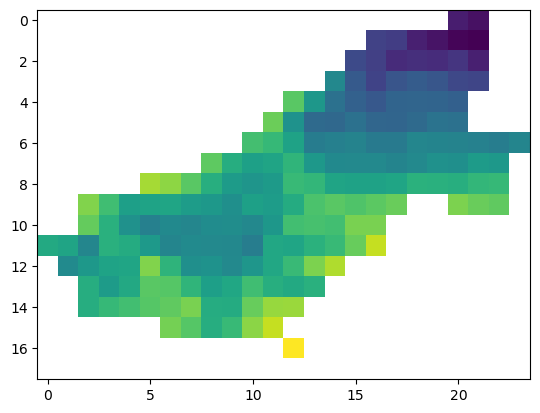

In [20]:

show(out_img)

In [21]:
final_averages = {}
for district in districtsnames:
    cum_avg = 0
    for month in average_months_bgdistricts:
        this_month_avg = month[district]
        cum_avg += this_month_avg
    avg = cum_avg/12
    final_averages[district] = avg

df_bg.temperature_average = final_averages.values()
df_bg

,NAME_LATN,precipitation_average,temperature_average,wind_speed_average
0,Sofia,54.085565,7.917574,2.915912
1,Burgas,47.589532,11.841585,2.929849
2,Dobrich,41.550633,11.072057,3.560082
3,Shumen,47.433962,10.667296,2.766465
4,Lovech,52.512077,9.579448,2.566308
5,Veliko Tarnovo,49.033550,11.425287,2.499862
6,Pleven,46.724638,11.624567,2.217502
7,Varna,44.034946,11.179208,3.282815
8,Vidin,51.595238,10.161022,2.312653
9,Montana,50.970339,10.345205,2.402720


In [42]:
#df_bg.to_csv(r"C:\Users\User\Documents\UNITN\Geospatial\For_GITHUB_project\Plovdiv_Infographics\Data\Climate\df_bg_climateinfo.csv")

In [23]:
df  = bg.merge(df_bg, on='NAME_LATN', how='left')
gdf_bg_full = gpd.GeoDataFrame(df)
#gdf_bg_full

# Choropleth maps

In [24]:
gdf_bg_full.explore(column= "precipitation_average")

In [43]:
#gdf_bg_full.to_file(r"C:\Users\User\Documents\UNITN\Geospatial\For_GITHUB_project\Plovdiv_Infographics\Data\Climate\gdf_bg_climateinfo.geojson", driver='GeoJSON')

In [ ]:
f = gpd.read_file(r"C:\Users\User\Documents\UNITN\Geospatial\For_GITHUB_project\Plovdiv_Infographics\Data\Climate\gdf_bg_climateinfo.geojson", driver='GeoJSON')


In [46]:
f.columns

Index(['NAME_LATN', 'NUTS_NAME', 'Pop_2019', 'Pop_city', 'Pop_villag', 'Area',
       'precipitation_average', 'temperature_average', 'wind_speed_average',
       'geometry'],
      dtype='object')

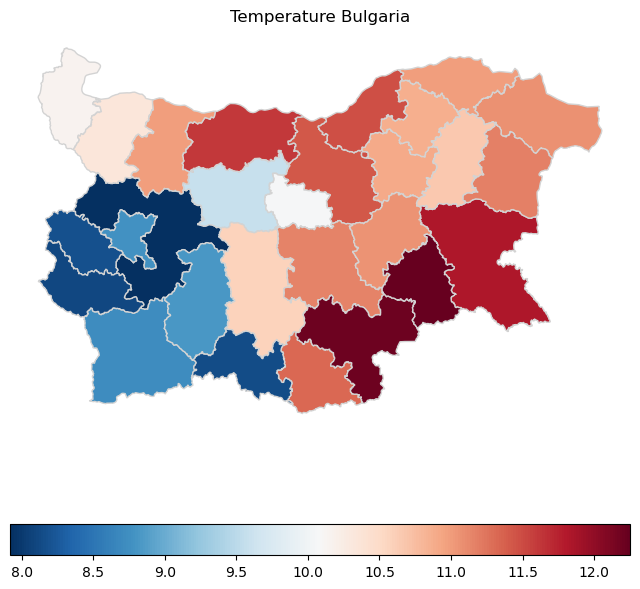

In [60]:
ax = f.plot(column='temperature_average',legend=True,figsize=(8,8), cmap = "RdBu_r", edgecolor="lightgray",legend_kwds={'orientation': "horizontal"})
ax.set_title("Temperature Bulgaria")
ax.set_axis_off()
plt.show()

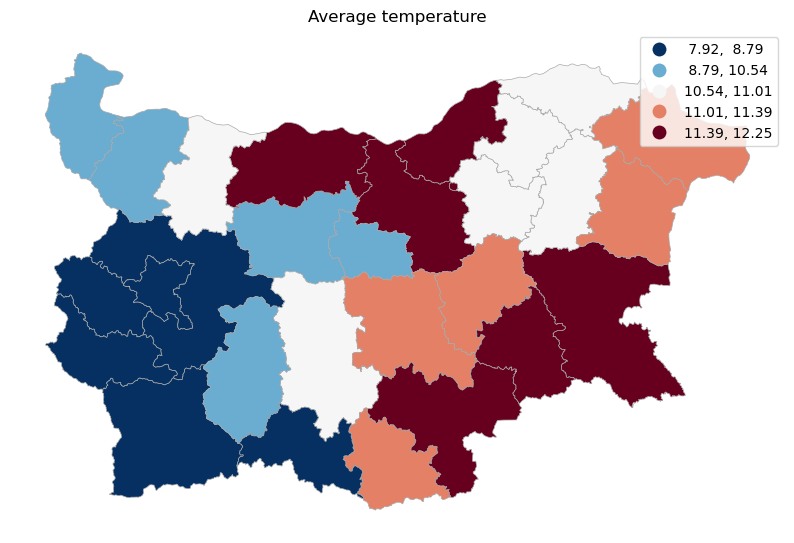

In [55]:
ax = f.plot(column='temperature_average',
                                      cmap="RdBu_r", edgecolor = "darkgrey", 
                                      linewidth = 0.5,legend=True,figsize=(10,10),
                                      scheme="quantiles", #equal_intervals #percentiles
                                      k=5)
ax.set_title('Average temperature')

ax.set_axis_off()
plt.show()

In [57]:
gdf_bg_full.explore(column= "temperature_average", cmap = "RdBu_r", tiles='CartoDB positron',
                    tooltip=["NAME_LATN",'precipitation_average', 'temperature_average', 'wind_speed_average'], control_scale = True)